# LAB 6 preamble code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import urllib.request
import tarfile
import io

# Additional Import Code for dataset GE

In [2]:
def load_tcga_data():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz'
    try:
        with urllib.request.urlopen(url) as response:
            with tarfile.open(fileobj=io.BytesIO(response.read()), mode="r:gz") as tar:
                data_path = 'TCGA-PANCAN-HiSeq-801x20531/data.csv'
                labels_path = 'TCGA-PANCAN-HiSeq-801x20531/labels.csv'
                data_file = tar.extractfile(data_path)
                X = pd.read_csv(data_file, index_col=0)
                labels_file = tar.extractfile(labels_path)
                labels_df = pd.read_csv(labels_file, index_col=0)
                y = labels_df['Class']
                return X, y
    except Exception as e:
        print(f"Failed to download or process data. Error: {e}")
        return None, None
X, y = load_tcga_data()
# verify that both the features and the labels loaded successfully
print(X.head())
print(y.head())

          gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
sample_1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
sample_2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
sample_3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
sample_4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   

          gene_20524  gene_20525  gene_20526  gene

# Question 1
## Load the data into feature matrix X and true cancer type labels y_true. Print the dimensions of X. How many patients and genes (features) are there? What does the numerical value of each feature in X represent? 

In [3]:
print("############ Assignment 6 Question 1 BEGIN ############")

X, y = load_tcga_data()

print(X.head())
print(y.head())

print("There are 801 patients and 20531 gene features.")
print("The numerical value of each feature in X represents the normalized expression level of that specific gene for a patient.")

print("############ Assignment 6 Question 1 END ############")

############ Assignment 6 Question 1 BEGIN ############
          gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
sample_1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
sample_2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
sample_3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
sample_4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.37379

# Question 2
## Do not do ANY scaling to any feature. Do not use PCA (Principal Component Analysis) in this assignment at any point. Train K-Means for all k <= 15 (Use random_state=0, n_init=10). Plot:
- WCSS v. k (Elbow Chart)
- Silhouette Score v. k
- ARI v. k


############ Assignment 6 Question 2 BEGIN ############


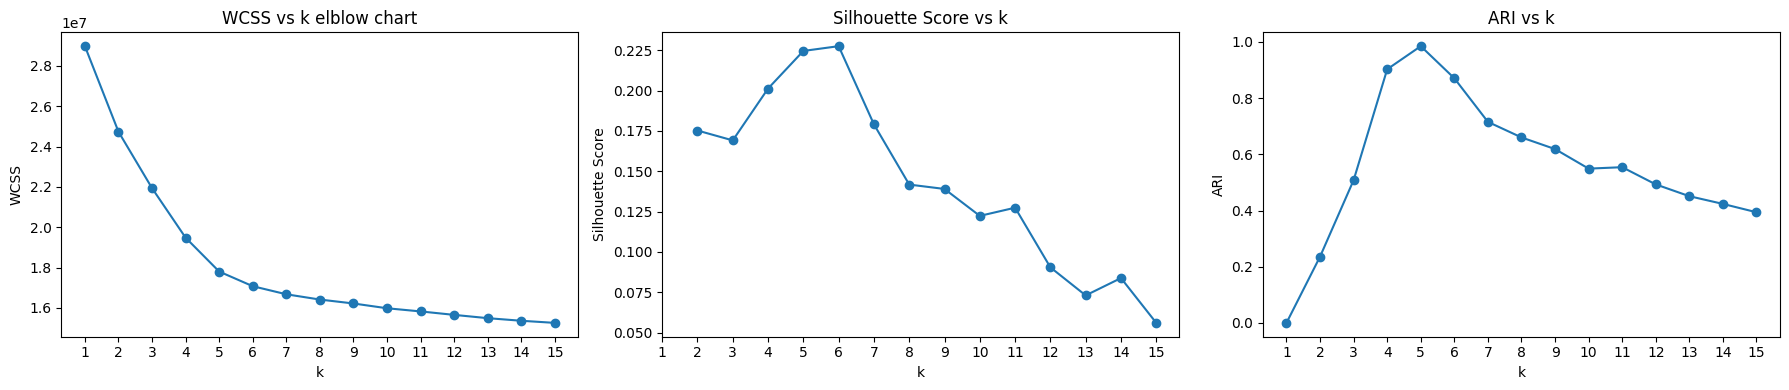

############ Assignment 6 Question 2 END ############


In [4]:
print("############ Assignment 6 Question 2 BEGIN ############")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np

ks = list(range(1, 16))
wcss = []
sil_scores = []
aris = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    labels = km.fit_predict(X)
    wcss.append(km.inertia_)
    if k > 1:
        sil_scores.append(silhouette_score(X, labels))
    else:
        sil_scores.append(np.nan)
    aris.append(adjusted_rand_score(y, labels))

fig, axes = plt.subplots(1, 3, figsize=(18, 4))

axes[0].plot(ks, wcss, marker='o')
axes[0].set_xticks(ks)
axes[0].set_xlabel('k')
axes[0].set_ylabel('WCSS')
axes[0].set_title('WCSS vs k elblow chart')

axes[1].plot(ks, sil_scores, marker='o')
axes[1].set_xticks(ks)
axes[1].set_xlabel('k')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs k')

axes[2].plot(ks, aris, marker='o')
axes[2].set_xticks(ks)
axes[2].set_xlabel('k')
axes[2].set_ylabel('ARI')
axes[2].set_title('ARI vs k')

plt.tight_layout()
plt.show()

print("############ Assignment 6 Question 2 END ############")

# Question 3
## Based on your analysis of Q2, what does each method recommend as the optimal “k”. If you did not know that the dataset contained 5 cancers, what “k” would you have picked and why?

In [4]:
print("############ Assignment 6 Question 3 BEGIN ############")

print("WCSS seems to recommend 5 as the recommended K, which is where the slope of decrease slows down significantly.")
print("Silhouette Score and ARI have the recommended K as 5 as well, which is where both of the charts peaked.\n")

print ("Had it not be made known that the dataset contained 5 cancers, I would still choose k=5")
print("this is from the clear visual from the Silhouette Score and ARI charts that show that there's a peak in score when k=5.")
##NOTE I AM UNSURE OF THIS EXPLANATION, PLEASE CHECK

print("############ Assignment 6 Question 3 END ############")

############ Assignment 6 Question 3 BEGIN ############
WCSS seems to recommend 5 as the recommended K, which is where the slope of decrease slows down significantly.
Silhouette Score and ARI have the recommended K as 5 as well, which is where both of the charts peaked.

Had it not be made known that the dataset contained 5 cancers, I would still choose k=5
this is from the clear visual from the Silhouette Score and ARI charts that show that there's a peak in score when k=5.
############ Assignment 6 Question 3 END ############


# Question 4
## Now, for k=5, extract the cluster centers (centroids) from the trained K-Means model using the .cluster_centers_ attribute. This will be a (5, n_features) array where each row is a centroid. For each of the 5 centroids, find the top 10 genes (i.e., the 10 feature indices with the highest expression values). Print the table that lists the top 10 genes for each cluster. Do you see any overlap in the top genes between clusters? What does a high value for a specific gene in a centroid signify biologically?

In [6]:
print("############ Assignment 6 Question 4 BEGIN ############")

print("############ Assignment 6 Question 4 END ############")

############ Assignment 6 Question 4 BEGIN ############
############ Assignment 6 Question 4 END ############


# Question 5
## Train an AgglomerativeClustering model with n_clusters = 15. Generate and plot a dendrogram. Use truncate_mode='level' and p=6 for the dendrogram.  Calculate the WCSS, Silhouette Score, and ARI at a cut of the dendrogram for all k <=10. Compare these 3 numbers for k = 3, 5, 7, 9 with Question 2. What are your observations on relative performance of the two techniques?

In [7]:
print("############ Assignment 6 Question 5 BEGIN ############")

print("############ Assignment 6 Question 5 END ############")

############ Assignment 6 Question 5 BEGIN ############
############ Assignment 6 Question 5 END ############


# Question 6
## Does the dendrogram show a branching structure that makes biological sense (e.g., are some cancer types more genetically similar to each other than to others)? What would a tall U-shape on this dendrogram mean biologically and what would a short U-shape indicate? Does the dendrogram offer clues about possible “sub-cancers” that might be worth exploring?

In [8]:
print("############ Assignment 6 Question 6 BEGIN ############")

print("############ Assignment 6 Question 6 END ############")

############ Assignment 6 Question 6 BEGIN ############
############ Assignment 6 Question 6 END ############


# Question 7
## The AgglomerativeClustering model trained in question 5 used the “ward” linkage method by default. Now, train the same model with the same parameters as in question 5, but use standard, complete, and average linkage methods. Calculate the WCSS, Silhouette Score, and ARI for each of these 3 new linkage methods for k=5. Compare the results of these 3 new linkage methods to ward linkage in question 5. Remark upon any differences that you see.

In [9]:
print("############ Assignment 6 Question 7 BEGIN ############")

print("############ Assignment 6 Question 7 END ############")

############ Assignment 6 Question 7 BEGIN ############
############ Assignment 6 Question 7 END ############
